In [132]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [133]:
import numpy as np
import pandas as pd

In [134]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [135]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [136]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [137]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [138]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [139]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [140]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

<function matplotlib.pyplot.show(*args, **kw)>

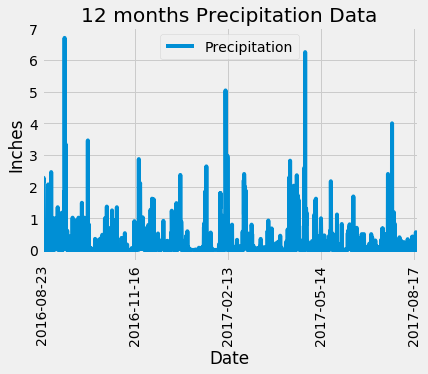

In [151]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

final_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
final_date_dt = dt.date(int(str(final_date[0]).split('-')[0]),int(str(final_date[0]).split('-')[1]),int(str(final_date[0]).split('-')[2]))
# display(final_date_dt)

# Perform a query to retrieve the data and precipitation scores
prev_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= final_date_dt - dt.timedelta(days=365))
# display(prev_year[0:20])

# Save the query results as a Pandas DataFrame and set the index to the date column
measurements_df = pd.DataFrame(prev_year)
# display(measurements_df.head(20))

# Sort the dataframe by date
clean_measurements_df = measurements_df.dropna().sort_values(by='date').set_index('date').rename(columns={'prcp':'Precipitation'})
# display(clean_measurements_df.head(20))

# Use Pandas Plotting with Matplotlib to plot the data
clean_measurements_df.plot()
plt.ylabel('Inches')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.title('12 months Precipitation Data')
plt.show

In [142]:
# Use Pandas to calcualte the summary statistics for the precipitation data
clean_measurements_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [143]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(Station).count()
display(f'There are {stations_count} available stations in the dataset')

'There are 9 available stations in the dataset'

In [144]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
display(active_stations)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [145]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == active_stations[0][0]).all()
#display(min_temp[0][0])
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == active_stations[0][0]).all()
#display(max_temp[0][0])
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == active_stations[0][0]).all()
#display(avg_temp[0][0])

station_name = session.query(Station.name).filter(Station.station == active_stations[0][0]).all()
#display(station_name)

print(f'The station {active_stations[0][0]} named "{station_name[0][0]}" recorded the next temperatures:\nMinimum temperature: {int(min_temp[0][0])}\nMaximum temperature: {int(max_temp[0][0])}\nAverage temperature: {round(avg_temp[0][0],2)}')



The station USC00519281 named "WAIHEE 837.5, HI US" recorded the next temperatures:
Minimum temperature: 54
Maximum temperature: 85
Average temperature: 71.66


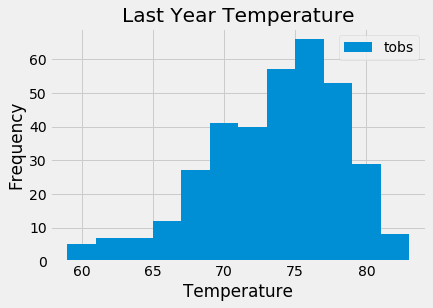

In [146]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= final_date_dt - dt.timedelta(days=365)).filter(Measurement.station == active_stations[0][0]).all()
#display(year_temps)
year_temps_df = pd.DataFrame(year_temps)
year_temps_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.title('Last Year Temperature')
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
